## 機器學習_分類_決策樹(Decision Trees) 應用於貸款預測
#### 資料來源 參考文件
https://blog.csdn.net/c406495762/article/details/75663451

https://github.com/Jack-Cherish/Machine-Learning/tree/master/Decision%20Tree

https://ithelp.ithome.com.tw/articles/10271143?sc=hot

https://tree.rocks/decision-tree-graphviz-contour-with-pandas-gen-train-test-dataset-for-beginner-9137b7c8416a

https://www.jiqizhixin.com/articles/2020-06-11-6

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

https://ithelp.ithome.com.tw/articles/10271143

## 實作決策樹建構
## STEP0: 前置作業:收集數據及準備數據集，收集完的數據，我們要進行整理
### 原始資料集
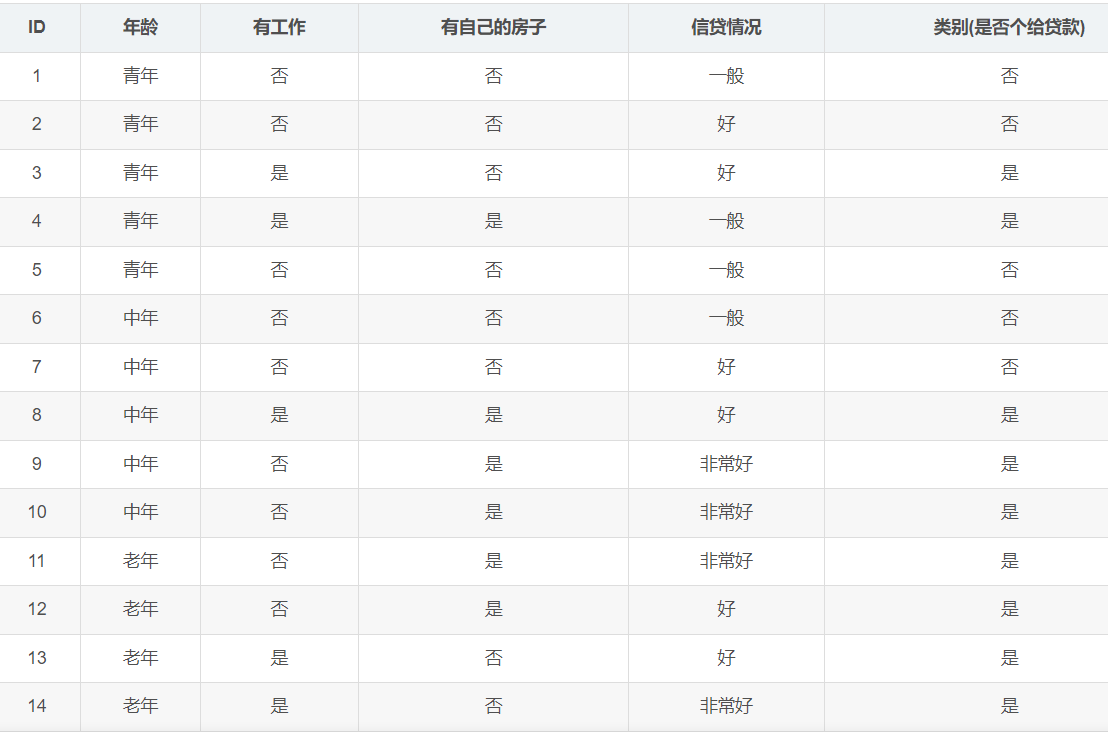

### 準備數據:準備特徵資料及整理資料
### 為方便後續程式處理,先對數據集的資料內容進行數值化標註轉換。
#### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
#### 類別(是否給貸款)：no 代表否，yes 代表是。


In [26]:
# matplotlib是Python語言及其數值計算庫NumPy的繪圖庫。
# https://matplotlib.org/
!pip install matplotlib

mysql-connector-python 8.0.19 has requirement protobuf==3.6.1, but you'll have protobuf 3.14.0 which is incompatible.
jupyter-console 5.2.0 has requirement prompt_toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# -*- coding: UTF-8 -*-
# matplotlib是Python語言及其數值計算庫NumPy的繪圖庫。
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
# math ---python 數學函式
from math import log
# operator module（模組）提供了一套與 Python 原生運算子對應的高效率函式。
# 例如，operator.add(x, y) 與運算式 x+y 相同。
import operator
#Pickle是python內建的套件，對物件結構提供了一個二進制序列化與反序列化功能的模組。
#主要用途是:資料永久儲存,資料傳輸,最小化資料
import pickle

In [3]:
"""
函数说明:创建数据集

Parameters:
	无
Returns:
	dataSet - 数据集
	labels - 特征标签
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-20
"""
def createDataSet():
	dataSet = [[0, 0, 0, 0, 'no'],						#数据集
			[0, 0, 0, 1, 'no'],
			[0, 1, 0, 1, 'yes'],
			[0, 1, 1, 0, 'yes'],
			[0, 0, 0, 0, 'no'],
			[1, 0, 0, 0, 'no'],
			[1, 0, 0, 1, 'no'],
			[1, 1, 1, 1, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[2, 0, 1, 2, 'yes'],
			[2, 0, 1, 1, 'yes'],
			[2, 1, 0, 1, 'yes'],
			[2, 1, 0, 2, 'yes'],
			[2, 0, 0, 0, 'no']]
	labels = ['年龄', '有工作', '有自己的房子', '信贷情况']		#特征标签
	return dataSet, labels 							#返回数据集和分类属性


In [6]:
dataSet, labels = createDataSet()
print(dataSet)
print(labels)

[[0, 0, 0, 0, 'no'], [0, 0, 0, 1, 'no'], [0, 1, 0, 1, 'yes'], [0, 1, 1, 0, 'yes'], [0, 0, 0, 0, 'no'], [1, 0, 0, 0, 'no'], [1, 0, 0, 1, 'no'], [1, 1, 1, 1, 'yes'], [1, 0, 1, 2, 'yes'], [1, 0, 1, 2, 'yes'], [2, 0, 1, 2, 'yes'], [2, 0, 1, 1, 'yes'], [2, 1, 0, 1, 'yes'], [2, 1, 0, 2, 'yes'], [2, 0, 0, 0, 'no']]
['年龄', '有工作', '有自己的房子', '信贷情况']


## STEP1:進行資料特徵選擇
### 對決策樹的構建來說是進行資料特徵選擇,特徵選擇就是決定用哪個資料特徵來劃分資料空間
#### 特徵選擇的方法主要有信息增益(information gain)或信息增益比

In [8]:
"""
函数说明:计算给定数据集的经验熵

Parameters:
	dataSet - 数据集
Returns:
	shannonEnt - 经验熵
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def calcShannonEnt(dataSet):
	numEntires = len(dataSet)						#返回数据集的行数
	labelCounts = {}								#保存每个标签(Label)出现次数的字典
	for featVec in dataSet:							#对每组特征向量进行统计
		currentLabel = featVec[-1]					#提取标签(Label)信息(yes,no)
		if currentLabel not in labelCounts.keys():	#如果标签(Label)没有放入统计次数的字典,添加进去
			labelCounts[currentLabel] = 0
		labelCounts[currentLabel] += 1				#Label计数
	shannonEnt = 0.0								#经验熵
	for key in labelCounts:							#计算熵
		prob = float(labelCounts[key]) / numEntires	#选择该标签(Label)的概率
		shannonEnt -= prob * log(prob, 2)			#利用公式计算
	return shannonEnt								#返回经验熵


In [10]:
print("经验熵:",calcShannonEnt(dataSet))

经验熵: 0.9709505944546686


In [11]:
#計算每個特徵的信息增益,找出最佳的特徵,準備當作決策樹起始節點
"""
函数说明:选择最优特征

Parameters:
	dataSet - 数据集
Returns:
	bestFeature - 信息增益最大的(最优)特征的索引值
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-20
"""
def chooseBestFeatureToSplit(dataSet):
	numFeatures = len(dataSet[0]) - 1					#特征数量
	baseEntropy = calcShannonEnt(dataSet) 				#计算数据集的香农熵
	bestInfoGain = 0.0  								#信息增益
	bestFeature = -1									#最优特征的索引值
	for i in range(numFeatures): 						#遍历所有特征
		#获取dataSet的第i个所有特征
		featList = [example[i] for example in dataSet]
		uniqueVals = set(featList)     					#创建set集合{},元素不可重复
		newEntropy = 0.0  								#经验条件熵
		for value in uniqueVals: 						#计算信息增益
			subDataSet = splitDataSet(dataSet, i, value) 		#subDataSet划分后的子集
			prob = len(subDataSet) / float(len(dataSet))   		#计算子集的概率
			newEntropy += prob * calcShannonEnt(subDataSet) 	#根据公式计算经验条件熵
		infoGain = baseEntropy - newEntropy 					#信息增益
		print("第%d个特征的增益为%.3f" % (i, infoGain))			#打印每个特征的信息增益
		if (infoGain > bestInfoGain): 							#计算信息增益
			bestInfoGain = infoGain 							#更新信息增益，找到最大的信息增益
			bestFeature = i 									#记录信息增益最大的特征的索引值
	return bestFeature 											#返回信息增益最大的特征的索引值



In [12]:
"""
函数说明:按照给定特征划分数据集

Parameters:
	dataSet - 待划分的数据集
	axis - 划分数据集的特征
	value - 需要返回的特征的值
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def splitDataSet(dataSet, axis, value):		
	retDataSet = []										#创建返回的数据集列表
	for featVec in dataSet: 							#遍历数据集
		if featVec[axis] == value:
			reducedFeatVec = featVec[:axis]				#去掉axis特征
			reducedFeatVec.extend(featVec[axis+1:]) 	#将符合条件的添加到返回的数据集
			retDataSet.append(reducedFeatVec)
	return retDataSet		  							#返回划分后的数据集



In [15]:
i=chooseBestFeatureToSplit(dataSet)
print("最佳的特徵:",i,labels[i])

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
最佳的特徵: 2 有自己的房子


## STEP2:生成決策樹
### 得到原始數據集，然後基於最好的屬性值劃分數據集，由於特徵值可能多於兩個，因此可能存在大於兩個分支的數據集劃分。第一次劃分之後，數據集被向下傳遞到樹的分支的下一個節點。在這個節點上，再次劃分數據。因此程式採用遞歸的方式處理數據集來建立決策樹。

In [16]:
"""
函数说明:创建决策树

Parameters:
	dataSet - 训练数据集
	labels - 分类属性标签
	featLabels - 存储选择的最优特征标签
Returns:
	myTree - 决策树
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
"""
def createTree(dataSet, labels, featLabels):
	classList = [example[-1] for example in dataSet]			#取分类标签(是否放贷:yes or no)
	if classList.count(classList[0]) == len(classList):			#如果类别完全相同则停止继续划分
		return classList[0]
	if len(dataSet[0]) == 1 or len(labels) == 0:									#遍历完所有特征时返回出现次数最多的类标签
		return majorityCnt(classList)
	bestFeat = chooseBestFeatureToSplit(dataSet)				#选择最优特征
	bestFeatLabel = labels[bestFeat]							#最优特征的标签
	featLabels.append(bestFeatLabel)
	myTree = {bestFeatLabel:{}}									#根据最优特征的标签生成树
	del(labels[bestFeat])										#删除已经使用特征标签
	featValues = [example[bestFeat] for example in dataSet]		#得到训练集中所有最优特征的属性值
	uniqueVals = set(featValues)								#去掉重复的属性值
	for value in uniqueVals:									#遍历特征，创建决策树。
		subLabels = labels[:]
		myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)
        
	return myTree

"""
函数说明:统计classList中出现此处最多的元素(类标签)

Parameters:
	classList - 类标签列表
Returns:
	sortedClassCount[0][0] - 出现此处最多的元素(类标签)
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def majorityCnt(classList):
	classCount = {}
	for vote in classList:										#统计classList中每个元素出现的次数
		if vote not in classCount.keys():classCount[vote] = 0	
		classCount[vote] += 1
	sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)		#根据字典的值降序排序
	return sortedClassCount[0][0]								#返回classList中出现次数最多的元素


In [17]:
featLabels = []
myTree = createTree(dataSet, labels, featLabels)

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474


In [19]:
print("生成決策樹使用的特徵節點:",featLabels)

生成決策樹使用的特徵節點: ['有自己的房子', '有工作']


## STEP3:測試決策樹

In [20]:
"""
函数说明:使用决策树分类

Parameters:
	inputTree - 已经生成的决策树
	featLabels - 存储选择的最优特征标签
	testVec - 测试数据列表，顺序对应最优特征标签
Returns:
	classLabel - 分类结果
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
""" 
def classify(inputTree, featLabels, testVec):
	firstStr = next(iter(inputTree))														#获取决策树结点
	secondDict = inputTree[firstStr]														#下一个字典
	featIndex = featLabels.index(firstStr)												
	for key in secondDict.keys():
		if testVec[featIndex] == key:
			if type(secondDict[key]).__name__ == 'dict':
				classLabel = classify(secondDict[key], featLabels, testVec)
			else: classLabel = secondDict[key]
	return classLabel


In [25]:
testVec = [0,1]										#测试数据['有自己的房子', '有工作']
result = classify(myTree, featLabels, testVec)
if result == 'yes':
    print('放贷')
if result == 'no':
    print('不放贷')

放贷


## 決策樹應用於貸款預測 完整程式範列

C:\Users\takming\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\takming\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\takming\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\takming\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\takming\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\takming\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23376 mi

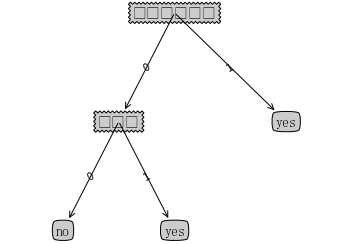

放贷


In [1]:
# -*- coding: UTF-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from math import log
import operator
import pickle

"""
函数说明:计算给定数据集的经验熵(香农熵)

Parameters:
	dataSet - 数据集
Returns:
	shannonEnt - 经验熵(香农熵)
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def calcShannonEnt(dataSet):
	numEntires = len(dataSet)						#返回数据集的行数
	labelCounts = {}								#保存每个标签(Label)出现次数的字典
	for featVec in dataSet:							#对每组特征向量进行统计
		currentLabel = featVec[-1]					#提取标签(Label)信息
		if currentLabel not in labelCounts.keys():	#如果标签(Label)没有放入统计次数的字典,添加进去
			labelCounts[currentLabel] = 0
		labelCounts[currentLabel] += 1				#Label计数
	shannonEnt = 0.0								#经验熵(香农熵)
	for key in labelCounts:							#计算香农熵
		prob = float(labelCounts[key]) / numEntires	#选择该标签(Label)的概率
		shannonEnt -= prob * log(prob, 2)			#利用公式计算
	return shannonEnt								#返回经验熵(香农熵)

"""
函数说明:创建测试数据集

Parameters:
	无
Returns:
	dataSet - 数据集
	labels - 特征标签
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-20
"""
def createDataSet():
	dataSet = [[0, 0, 0, 0, 'no'],						#数据集
			[0, 0, 0, 1, 'no'],
			[0, 1, 0, 1, 'yes'],
			[0, 1, 1, 0, 'yes'],
			[0, 0, 0, 0, 'no'],
			[1, 0, 0, 0, 'no'],
			[1, 0, 0, 1, 'no'],
			[1, 1, 1, 1, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[2, 0, 1, 2, 'yes'],
			[2, 0, 1, 1, 'yes'],
			[2, 1, 0, 1, 'yes'],
			[2, 1, 0, 2, 'yes'],
			[2, 0, 0, 0, 'no']]
	labels = ['年龄', '有工作', '有自己的房子', '信贷情况']		#特征标签
	return dataSet, labels 							#返回数据集和分类属性

"""
函数说明:按照给定特征划分数据集

Parameters:
	dataSet - 待划分的数据集
	axis - 划分数据集的特征
	value - 需要返回的特征的值
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def splitDataSet(dataSet, axis, value):		
	retDataSet = []										#创建返回的数据集列表
	for featVec in dataSet: 							#遍历数据集
		if featVec[axis] == value:
			reducedFeatVec = featVec[:axis]				#去掉axis特征
			reducedFeatVec.extend(featVec[axis+1:]) 	#将符合条件的添加到返回的数据集
			retDataSet.append(reducedFeatVec)
	return retDataSet		  							#返回划分后的数据集

"""
函数说明:选择最优特征

Parameters:
	dataSet - 数据集
Returns:
	bestFeature - 信息增益最大的(最优)特征的索引值
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-20
"""
def chooseBestFeatureToSplit(dataSet):
	numFeatures = len(dataSet[0]) - 1					#特征数量
	baseEntropy = calcShannonEnt(dataSet) 				#计算数据集的香农熵
	bestInfoGain = 0.0  								#信息增益
	bestFeature = -1									#最优特征的索引值
	for i in range(numFeatures): 						#遍历所有特征
		#获取dataSet的第i个所有特征
		featList = [example[i] for example in dataSet]
		uniqueVals = set(featList)     					#创建set集合{},元素不可重复
		newEntropy = 0.0  								#经验条件熵
		for value in uniqueVals: 						#计算信息增益
			subDataSet = splitDataSet(dataSet, i, value) 		#subDataSet划分后的子集
			prob = len(subDataSet) / float(len(dataSet))   		#计算子集的概率
			newEntropy += prob * calcShannonEnt(subDataSet) 	#根据公式计算经验条件熵
		infoGain = baseEntropy - newEntropy 					#信息增益
		# print("第%d个特征的增益为%.3f" % (i, infoGain))			#打印每个特征的信息增益
		if (infoGain > bestInfoGain): 							#计算信息增益
			bestInfoGain = infoGain 							#更新信息增益，找到最大的信息增益
			bestFeature = i 									#记录信息增益最大的特征的索引值
	return bestFeature 											#返回信息增益最大的特征的索引值


"""
函数说明:统计classList中出现此处最多的元素(类标签)

Parameters:
	classList - 类标签列表
Returns:
	sortedClassCount[0][0] - 出现此处最多的元素(类标签)
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def majorityCnt(classList):
	classCount = {}
	for vote in classList:										#统计classList中每个元素出现的次数
		if vote not in classCount.keys():classCount[vote] = 0	
		classCount[vote] += 1
	sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)		#根据字典的值降序排序
	return sortedClassCount[0][0]								#返回classList中出现次数最多的元素

"""
函数说明:创建决策树

Parameters:
	dataSet - 训练数据集
	labels - 分类属性标签
	featLabels - 存储选择的最优特征标签
Returns:
	myTree - 决策树
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
"""
def createTree(dataSet, labels, featLabels):
	classList = [example[-1] for example in dataSet]			#取分类标签(是否放贷:yes or no)
	if classList.count(classList[0]) == len(classList):			#如果类别完全相同则停止继续划分
		return classList[0]
	if len(dataSet[0]) == 1 or len(labels) == 0:									#遍历完所有特征时返回出现次数最多的类标签
		return majorityCnt(classList)
	bestFeat = chooseBestFeatureToSplit(dataSet)				#选择最优特征
	bestFeatLabel = labels[bestFeat]							#最优特征的标签
	featLabels.append(bestFeatLabel)
	myTree = {bestFeatLabel:{}}									#根据最优特征的标签生成树
	del(labels[bestFeat])										#删除已经使用特征标签
	featValues = [example[bestFeat] for example in dataSet]		#得到训练集中所有最优特征的属性值
	uniqueVals = set(featValues)								#去掉重复的属性值
	for value in uniqueVals:									#遍历特征，创建决策树。
		subLabels = labels[:]
		myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)
        
	return myTree

"""
函数说明:获取决策树叶子结点的数目

Parameters:
	myTree - 决策树
Returns:
	numLeafs - 决策树的叶子结点的数目
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def getNumLeafs(myTree):
    numLeafs = 0												#初始化叶子
    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]								#获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

"""
函数说明:获取决策树的层数

Parameters:
	myTree - 决策树
Returns:
	maxDepth - 决策树的层数
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def getTreeDepth(myTree):
    maxDepth = 0												#初始化决策树深度
    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]								#获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth			#更新层数
    return maxDepth

"""
函数说明:绘制结点

Parameters:
	nodeTxt - 结点名
	centerPt - 文本位置
	parentPt - 标注的箭头位置
	nodeType - 结点格式
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
	arrow_args = dict(arrowstyle="<-")											#定义箭头格式
	font = FontProperties(fname=r"c:\windows\fonts\simsunb.ttf", size=14)		#设置中文字体
	createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',	#绘制结点
		xytext=centerPt, textcoords='axes fraction',
		va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)

"""
函数说明:标注有向边属性值

Parameters:
	cntrPt、parentPt - 用于计算标注位置
	txtString - 标注的内容
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
""" 
def plotMidText(cntrPt, parentPt, txtString):
	xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]											#计算标注位置					
	yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
	createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

"""
函数说明:绘制决策树

Parameters:
	myTree - 决策树(字典)
	parentPt - 标注的内容
	nodeTxt - 结点名
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
""" 
def plotTree(myTree, parentPt, nodeTxt):
	decisionNode = dict(boxstyle="sawtooth", fc="0.8")										#设置结点格式
	leafNode = dict(boxstyle="round4", fc="0.8")											#设置叶结点格式
	numLeafs = getNumLeafs(myTree)  														#获取决策树叶结点数目，决定了树的宽度
	depth = getTreeDepth(myTree)															#获取决策树层数
	firstStr = next(iter(myTree))															#下个字典     											
	cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)	#中心位置
	plotMidText(cntrPt, parentPt, nodeTxt)													#标注有向边属性值
	plotNode(firstStr, cntrPt, parentPt, decisionNode)										#绘制结点
	secondDict = myTree[firstStr]															#下一个字典，也就是继续绘制子结点
	plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD										#y偏移
	for key in secondDict.keys():								
		if type(secondDict[key]).__name__=='dict':											#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
			plotTree(secondDict[key],cntrPt,str(key))        								#不是叶结点，递归调用继续绘制
		else:																				#如果是叶结点，绘制叶结点，并标注有向边属性值 											
			plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
			plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
			plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
	plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

"""
函数说明:创建绘制面板

Parameters:
	inTree - 决策树(字典)
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
""" 
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')													#创建fig
    fig.clf()																				#清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    							#去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))											#获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))											#获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;								#x偏移
    plotTree(inTree, (0.5,1.0), '')															#绘制决策树
    plt.show()																				#显示绘制结果

"""
函数说明:使用决策树分类

Parameters:
	inputTree - 已经生成的决策树
	featLabels - 存储选择的最优特征标签
	testVec - 测试数据列表，顺序对应最优特征标签
Returns:
	classLabel - 分类结果
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
""" 
def classify(inputTree, featLabels, testVec):
	firstStr = next(iter(inputTree))														#获取决策树结点
	secondDict = inputTree[firstStr]														#下一个字典
	featIndex = featLabels.index(firstStr)												
	for key in secondDict.keys():
		if testVec[featIndex] == key:
			if type(secondDict[key]).__name__ == 'dict':
				classLabel = classify(secondDict[key], featLabels, testVec)
			else: classLabel = secondDict[key]
	return classLabel

"""
函数说明:存储决策树

Parameters:
	inputTree - 已经生成的决策树
	filename - 决策树的存储文件名
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
""" 
def storeTree(inputTree, filename):
	with open(filename, 'wb') as fw:
		pickle.dump(inputTree, fw)

"""
函数说明:读取决策树

Parameters:
	filename - 决策树的存储文件名
Returns:
	pickle.load(fr) - 决策树字典
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
""" 
def grabTree(filename):
	fr = open(filename, 'rb')
	return pickle.load(fr)


if __name__ == '__main__':
	dataSet, labels = createDataSet()
	featLabels = []
	myTree = createTree(dataSet, labels, featLabels)
	createPlot(myTree)
	testVec = [0,1]										#测试数据
	result = classify(myTree, featLabels, testVec)
	if result == 'yes':
		print('放贷')
	if result == 'no':
		print('不放贷')

## <LI>練習實作Sklearn 的 DecisionTreeClassifier,以貸款預測做範例

### https://ithelp.ithome.com.tw/articles/10271143

### sklearn 的分類決策樹套件 DecisionTreeClassifier    

### Parameters:
#### criterion: 亂度的評估標準，gini/entropy。預設為gini。
#### max_depth: 樹的最大深度。
#### splitter: 特徵劃分點選擇標準，best/random。預設為best。
#### random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
#### min_samples_split: 至少有多少資料才能再分
#### min_samples_leaf: 分完至少有多少資料節點才能再分

### Attributes:
#### feature_importances_: 查詢模型特徵的重要程度。
### Methods:
#### fit: 放入X、y進行模型擬合。
#### predict: 預測並回傳預測類別。
#### score: 預測成功的比例。
#### predict_proba: 預測每個類別的機率值。
#### get_depth: 取得樹的深度。

### 以下為程式碼使用範例說明
from sklearn.tree import DecisionTreeClassifier
#### 建立 DecisionTreeClassifier 模型
decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=42)
#### 使用訓練資料訓練模型
decisionTreeModel.fit(train_reduced, y_train)
#### 使用訓練資料預測分類
predicted = decisionTreeModel.predict(train_reduced)
##### 計算準確率
accuracy = decisionTreeModel.score(train_reduced, y_train)

### STEP1 標註資料及建立資料集
#### 直接使用Python的numpy array建構資料集。
#### 建立一個是否貸款類別及對應的特徵資料集

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
##### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
loan_data_X =np.array( [[0, 0, 0, 0],						#数据集
			[0, 0, 0, 1],
			[0, 1, 0, 1],
			[0, 1, 1, 0],
			[0, 0, 0, 0],
			[1, 0, 0, 0],
			[1, 0, 0, 1],
			[1, 1, 1, 1],
			[1, 0, 1, 2],
			[1, 0, 1, 2],
			[2, 0, 1, 2],
			[2, 0, 1, 1],
			[2, 1, 0, 1],
			[2, 1, 0, 2],
			[2, 0, 0, 0]])
#
#### 是否放貸款: 0:不放貸,1:放貸
loan_type_y =np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0])
print(loan_data_X.shape,loan_type_y.shape)

(15, 4) (15,)


### STEP2 切割訓練集與測試集

In [3]:
# 使用Scikit-Learn 的 train_test_split() 這個函式來做資料分割
from sklearn.model_selection import train_test_split
#train_test_split(『原始的資料』、『random_state』、『比例』)
#參數
#原始的資料：是我們打算切成 Training data 以及 Test data 的原始資料
#random_state： 亂數種子，可以固定我們切割資料的結果
#比例：可以設定 train_size 或 test_size，只要設定一邊即可，範圍在 [0-1] 之間
X_train, X_test, y_train, y_test = train_test_split(loan_data_X, loan_type_y, test_size=0.2)
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (12, 4)
test shape: (3, 4)


### STEP3 建構決策樹模型

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')

### STEP4 訓練模型

In [6]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### STEP5 使用Score,F1-Score評估模型

In [7]:
#使用Score評估模型
# 預測成功的比例
print('訓練集: ',dt.score(X_train,y_train))
print('測試集: ',dt.score(X_test,y_test))

訓練集:  1.0
測試集:  1.0


In [9]:
#使用F1-Score評估模型
from sklearn.metrics import f1_score
# 預測成功的比例
dt_pred_train = dt.predict(X_train)
print('訓練集 Evaluation F1-Score=>',f1_score(y_train,dt_pred_train))
dt_pred_test = dt.predict(X_test)
print('測試集 Evaluation F1-Score=>',f1_score(y_test,dt_pred_test))

訓練集 Evaluation F1-Score=> 1.0
測試集 Evaluation F1-Score=> 1.0


### 資料量太少 似乎過度擬合

### STEP6 進行預測

In [17]:
# 使用predict預測分類
##### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
new_x =np.array([[2,0,0,0]])
predicted =dt.predict(new_x)
print(predicted)
if(predicted[0]==1):
    print("放貸")
elif(predicted[0]==0):
    print("不放貸")

[0]
不放貸
